Data set: https://data.iowa.gov/Correctional-System/3-Year-Recidivism-for-Offenders-Released-from-Pris/mw8r-vqy4

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [33]:
# load the data set into a pandas data frame
iowa_df = pd.read_csv("3-Year_Recidivism_for_Offenders_Released_from_Prison_in_Iowa.csv")

# iowa_df.head(5) # Show the first 5 rows of the dataframe

In [34]:
# printing out unique values of a column
# iowa_df['Race - Ethnicity'].unique()

In [35]:
drop_row_list = ['White -', 'Black -', 'N/A -']

iowa_clean_df = iowa_df[~iowa_df['Race - Ethnicity'].isin(drop_row_list)]

 #iowa_clean_df


In [36]:
features_list = ['Release Type', 'Age At Release ', 'Offense Classification', 'Offense Type', 'Target Population']

features_df = iowa_clean_df[features_list]
print(type(features_df))
labels_df = iowa_clean_df[['Return to Prison']]



labels_df

<class 'pandas.core.frame.DataFrame'>


,Return to Prison
0,Yes
1,Yes
2,Yes
3,No
4,Yes
...,...
26015,No
26016,No
26017,No
26018,No


In [37]:
# gets the ethnicity count and the gender count within each ethnicity group
ethnic_gender_series = iowa_clean_df.groupby(['Race - Ethnicity', 'Sex']).count()['Fiscal Year Released']
ethnic_gender_series

Race - Ethnicity                                 Sex   
American Indian or Alaska Native - Hispanic      Female        8
                                                 Male         12
American Indian or Alaska Native - Non-Hispanic  Female       95
                                                 Male        407
Asian or Pacific Islander - Hispanic             Male          5
Asian or Pacific Islander - Non-Hispanic         Female       21
                                                 Male        171
Black - Hispanic                                 Female        3
                                                 Male         34
Black - Non-Hispanic                             Female      634
                                                 Male       5475
White - Hispanic                                 Female      111
                                                 Male       1411
White - Non-Hispanic                             Female     2463
                                  

In [38]:
# separating list out by male and female to create stacked bar plot
female_count_list = []
male_count_list = []
for i in range(ethnic_gender_series.size):
    idx = i
    if (idx) % 2 == 0:
        male_count_list.append(ethnic_gender_series[idx])
    else:
        female_count_list.append(ethnic_gender_series[idx])
        
print(male_count_list)
print(female_count_list)

female_count_list.insert(2, 0)
print(female_count_list)

[8, 95, 5, 171, 34, 5475, 1411, 15121]
[12, 407, 21, 3, 634, 111, 2463]
[12, 407, 0, 21, 3, 634, 111, 2463]


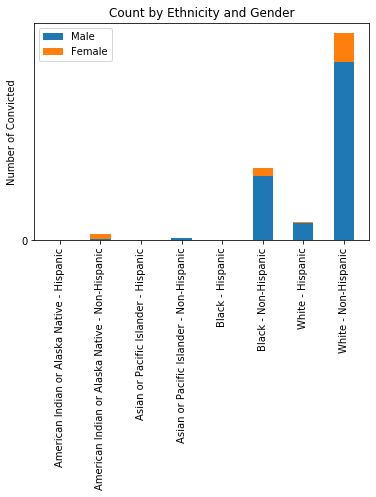

In [39]:
# create the stacked bar plot
width = 0.5
ind = np.arange(8) 

p1 = plt.bar(ind, male_count_list, width)
p2 = plt.bar(ind, female_count_list, width, bottom=male_count_list)

ethnic_list = ['American Indian or Alaska Native - Hispanic', \
               'American Indian or Alaska Native - Non-Hispanic', \
               'Asian or Pacific Islander - Hispanic', \
               'Asian or Pacific Islander - Non-Hispanic', \
               'Black - Hispanic', \
               'Black - Non-Hispanic', \
               'White - Hispanic', \
               'White - Non-Hispanic']


# ethnic_list = iowa_clean_df['Race - Ethnicity'].unique()

plt.title('Count by Ethnicity and Gender')
plt.ylabel('Number of Convicted')
plt.xticks(ind, ethnic_list, rotation=90)
plt.yticks(np.arange(0, 1000, 1000))
plt.legend((p1[0], p2[0]), ('Male', 'Female'))

plt.show()

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing

print(features_df.columns)
print(type(features_df))
features_df["Release Type"]=features_df["Release Type"].astype("category")
features_df["Age At Release "]=features_df["Age At Release "].astype("category")
features_df["Offense Classification"]=features_df["Offense Classification"].astype("category")
features_df["Offense Type"]=features_df["Offense Type"].astype("category")
features_df["Target Population"]=features_df["Target Population"].astype("category")
labels_df["Return to Prison"]=labels_df["Return to Prison"].astype("category")
le = preprocessing.LabelEncoder()
#print(type(features_df["Release Type"]))
features_df["Release Type"] = features_df["Release Type"].cat.codes
#features_df["Release Age "] = features_df["Release Age "].cat.codes
features_df['Age At Release '] = features_df['Age At Release '].cat.codes
features_df["Offense Classification"] = features_df["Offense Classification"].cat.codes
features_df["Offense Type"] = features_df["Offense Type"].cat.codes
features_df["Target Population"] = features_df["Target Population"].cat.codes 
le.fit(labels_df["Return to Prison"])
labels_df["Return to Prison"] = labels_df["Return to Prison"].cat.codes
print(labels_df)


x_train, x_test, y_train, y_test = train_test_split(features_df, labels_df, test_size=0.25, random_state=0)
print("done")
logisticRegr = LogisticRegression()
logisticRegr.fit(x_train, y_train)
predictions = logisticRegr.predict(x_test)
score = logisticRegr.score(x_test, y_test)
print(score)







Index(['Release Type', 'Age At Release ', 'Offense Classification',
       'Offense Type', 'Target Population'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
       Return to Prison
0                     1
1                     1
2                     1
3                     0
4                     1
...                 ...
26015                 0
26016                 0
26017                 0
26018                 0
26019                 1

[26001 rows x 1 columns]
done
0.6583602522688817


/Users/andizhao/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/Users/andizhao/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/andizhao/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cave